In [40]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/Datos.csv')

Lo primero que me gustaria son dos cosas: 

1. Colocar un limite a la muestra de filas
2. Establecer un default para el tamaño de las graficas 

In [37]:
# Show up 5 rows by default
pd.set_option("display.max_rows", 12)

# Increase plots size
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 10)

Quiero entender que tipo de dato tengo y cual debo cambiar. 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63221 entries, 0 to 63220
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Orden            63221 non-null  int64  
 1   Fecha            63221 non-null  object 
 2   Medio            63221 non-null  object 
 3   Vendedor         63221 non-null  object 
 4   Plataforma       63221 non-null  object 
 5   Comisión         63221 non-null  object 
 6   Tipo Orden       63221 non-null  object 
 7   Tipo de Cliente  63221 non-null  object 
 8   Sexo             63221 non-null  object 
 9   Categoría        63221 non-null  object 
 10  Producto         63221 non-null  object 
 11  Precio           63221 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 5.8+ MB


In [6]:
### Cambiare precio a un valor numeroc ya que estaba como un tipo objeto.
df["Precio"] = pd.to_numeric(df["Precio"])

#### Mi analisis cambia dependiendo el objetivo. 

Por ejemplo, mi objetivo puede ser entender que canales son los mas beneficiosos para la empresa o entender que productos se venden mas. Inclusive puedo mezclar los dos objetivos anteriores y hacer un nuevo objetivo que busque entender cuales son los canales que mas venden y que productos son los que mas venden. 

En este caso no hay un objetivo pero marcare mi ritmo tratando de emular uno.

- Primero, quiero entender las distribuciones de distintas variables.
- Despues, quiero mezclar las variables y hacer un analisis mas profundo.
- Por ultimo, comunicar lo que entendi de todo el analisis. 

In [39]:
df["Precio"].describe()

count    63221.000000
mean        40.680312
std         13.574989
min         10.000000
25%         34.000000
50%         40.000000
75%         50.000000
max        100.000000
Name: Precio, dtype: float64

<AxesSubplot:xlabel='Precio', ylabel='Count'>

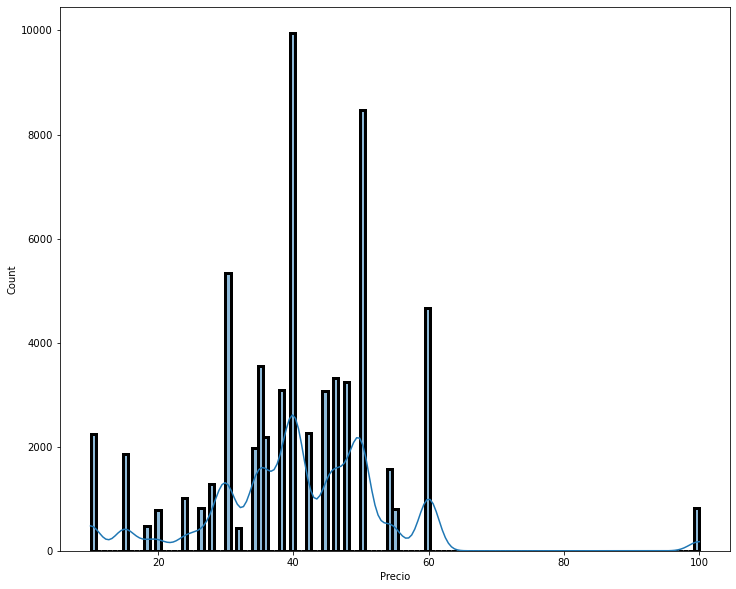

In [21]:
sns.histplot(
    df, 
    x="Precio",
    linewidth=3, 
    kde = True)

Esto nos dice dos cosas: 
* La primera es que el precio de los productos de la tienda se encuentran entre el rango de 10 y 100 pesos.
* Y la segunda es que la mayoria de los productos se encuentra entre un precio de 20 y 50 pesos.

In [23]:
df["Sexo"].value_counts()

Mujeres    35937
Hombre     27284
Name: Sexo, dtype: int64

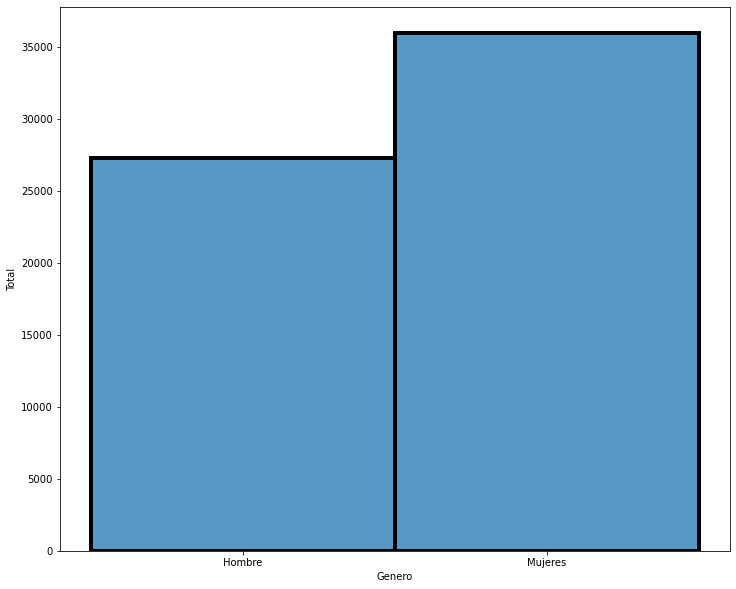

In [63]:
ax = sns.histplot(df,
                  x="Sexo",
                  linewidth=4)
ax.set(xlabel='Genero', 
       ylabel='Total')
plt.show()

<AxesSubplot:xlabel='Plataforma', ylabel='Count'>

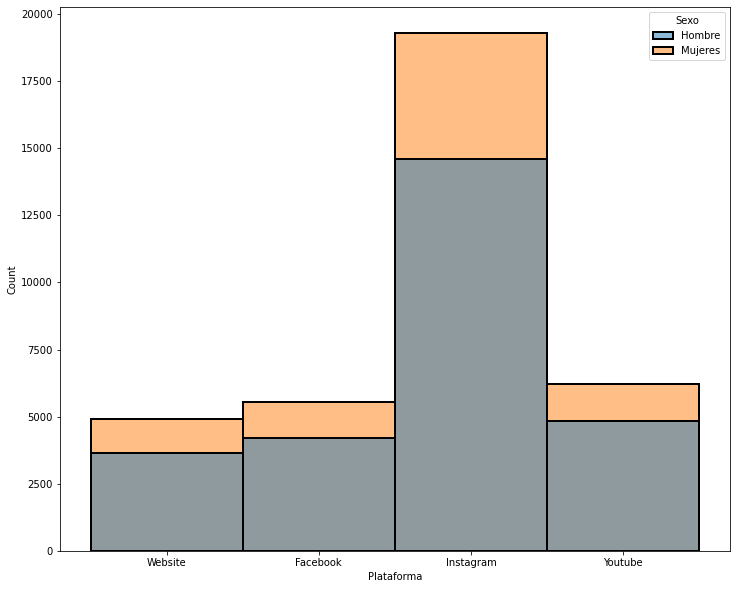

In [64]:
sns.histplot(
    df, 
    x="Plataforma",
    hue="Sexo",
    linewidth=2)

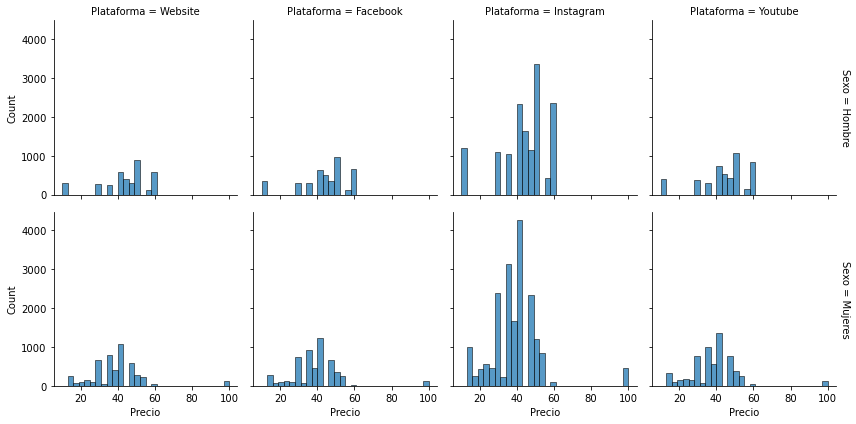

In [32]:
sns.displot(df, 
            x="Precio", 
            col="Plataforma", 
            row="Sexo", 
            binwidth=3, 
            height=3, 
            facet_kws=dict(margin_titles=True))

Ya estamos obteniendo mas insights.

1. Hay casi 7,000 mujeres mas que hombres dentro de la plataforma.
2. Las plataformas que más predomina es Instagram, seguido de Youtube, Facebook y el Website del comercio.
3. Las mujeres se mantienen a la cabeza dentro de los 4 canales. 
4. En el ultimo histograma podemos observar distintas cosas.
    - 4.1 Las mujeres compran más articulos que los hombres dentro de cualquier plataforma
    - 4.2 Las mujeres compran articulos del maximo rango en cualquier plataforma.
    - 4.3 La plataforma que más productos de alto valor vende es Instagram.